# Doctor's Consultation Fees Prediction

Description: This dataset is collection of all features required to predict the doctor's consultation fees based on those features.
    It consist of train dataset and test dataset to predict the consultation fee. Here the target variable is 'fees' and 6 independant varibles.
    Performing regression techniques to predict the doctor's consultation fees.
    

In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting the Dataset

In [4]:
train=pd.read_csv("Final_Train.csv")

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Here we can observe that the train data has 7 columns and 5961 rows on the prediction analysis will be done. In this dataset except Fees
rest are object data which need to be treated later on. Here the Independant variables are 'Qualification','Experience','Rating','Place',
'Profile','Miscellaneous_Info' and 'Fees' as dependant variable.

In [8]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

From above we can see that there are 3302 null values in Rating feature, Place having 25 null values and 2620 null values in Miscellaneous_Info feature.

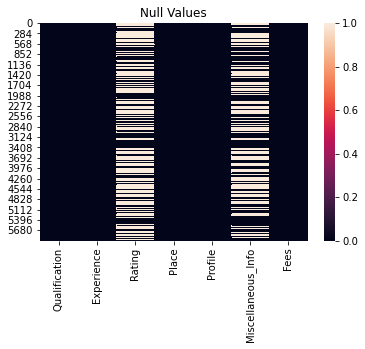

In [9]:
sns.heatmap(train.isnull())
plt.title('Null Values')
plt.show()

In above heatmap grapg, white lines showing in 'Rating' and 'Miscellaneous_Info' confirms that there are null values present.

# EDA

In [10]:
# perform EDA to check the relation with target variable for profile.

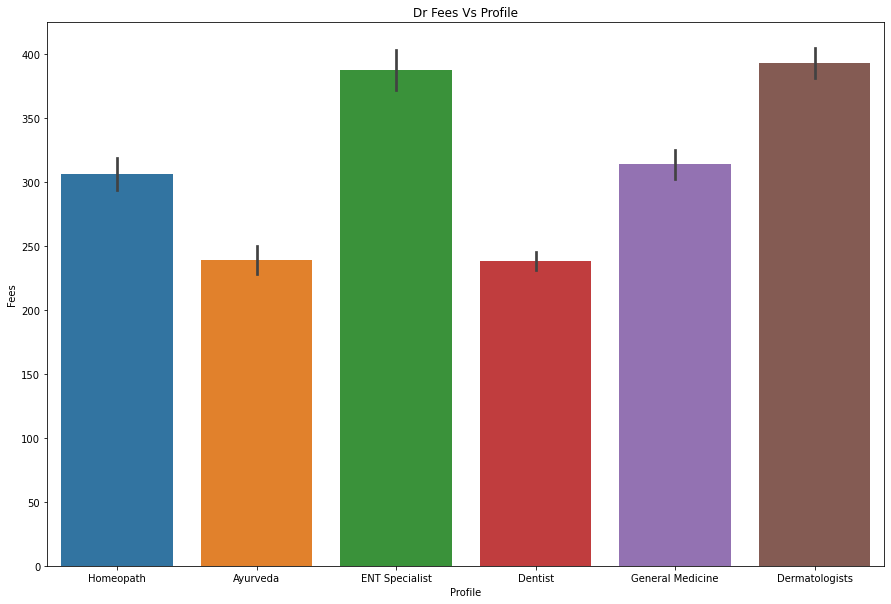

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x='Profile',y='Fees',data=train)
plt.title("Dr Fees Vs Profile")
plt.show()

Here we can observe that profiles with 'Dermatalogits' and 'ENT Specialist' are having high fees.

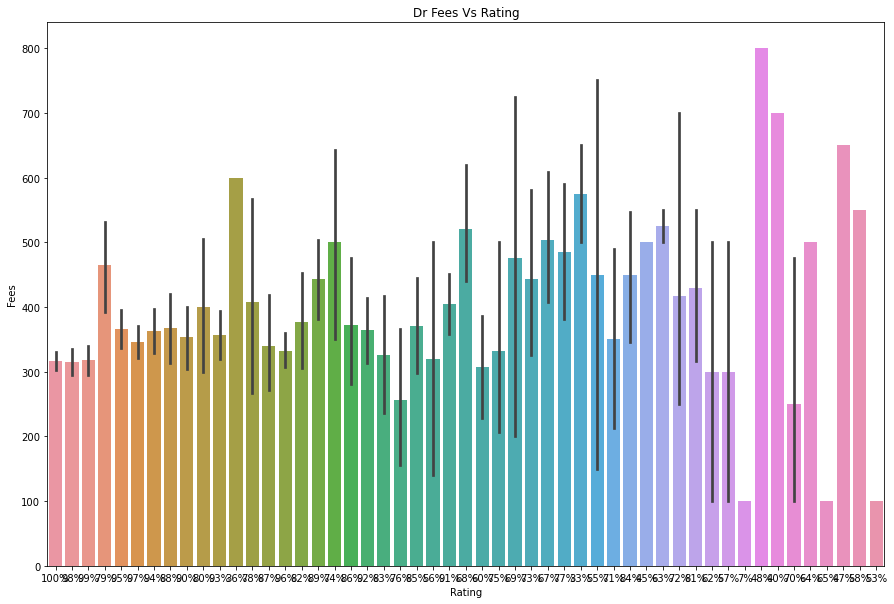

In [12]:
plt.figure(figsize=(15,10))
sns.barplot(x='Rating',y='Fees',data=train)
plt.title("Dr Fees Vs Rating")
plt.show()

Here we can observe that Rating with 4 & 5 are having higher Doctor's fees. We can notice that higher rating not giving the rise in Doctor's fees thus its not positively correlated.

In [13]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


We observed that the median of experience in bin 4 & 5 is 27 and 31 years respectively. whereas in highest rating of 10th bin the median experience is 14 years.
So here as well more experience is not giving good rating to Docters.

# Data Cleaning

In [14]:
#As We can see that column ' Miscellaneous Items' containing the messy information and also similar information as other columns. Thus we can remove it.
#Column Area also giving same information as quite similar to city. Thus can remove that too.

In [15]:
# Extracting the Place into 'Area' and 'city' to get more information from dataset

In [16]:
train.Place.fillna('Notknown,Notknown',inplace=True)

train['Area'] = train['Place'].str.split(",").str[0]
train['City'] = train['Place'].str.split(",").str[1]

In [17]:
#Target Variable analysis with different cities.

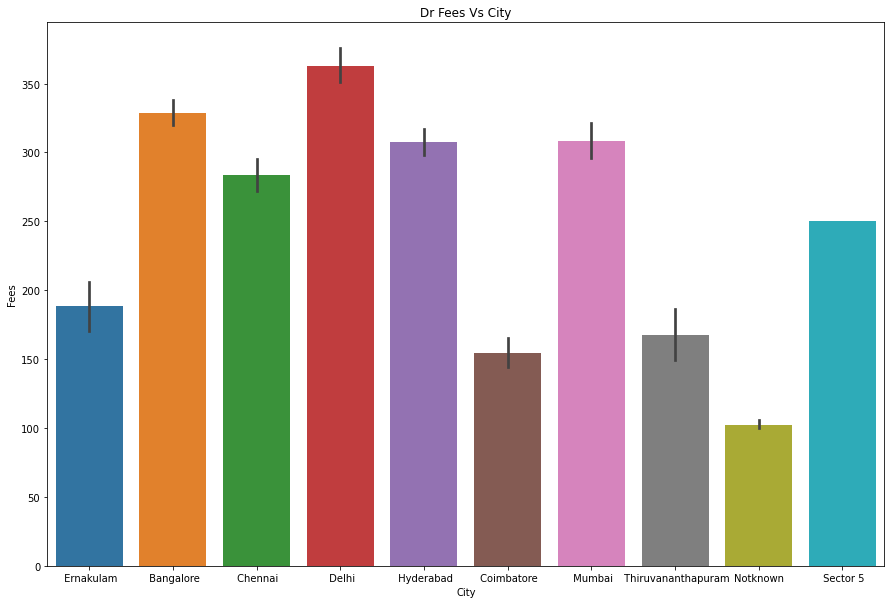

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x='City',y='Fees',data=train)
plt.title("Dr Fees Vs City")
plt.show()

Here we can see that Docter's fees is higher for Delhi & Bangalore cities in conparison to other cities.

In [19]:
# Dropping 'Place'

In [20]:
train.drop(['Place'],axis=1)

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Basavanagudi,Bangalore
5957,MBBS,33 years experience,NaN,General Medicine,NaN,100,Nungambakkam,Chennai
5958,MBBS,41 years experience,97%,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Greater Kailash Part 2,Delhi
5959,"MBBS, MD - General Medicine",15 years experience,90%,General Medicine,General Medical Consultation Viral Fever Treat...,100,Vileparle West,Mumbai


Thus here we can see that Place is more informative with Area and city. 

In [21]:
# Filling missing values in 'Rating' column

In [22]:
train['Rating'].fillna('-99%',inplace=True)

In [23]:
# extracting value of rating to remove '%' and convert to numeric value
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [24]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,-99,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,-99,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


In [25]:
# To make Rating values more simplified, we need to group the percentage in 0-9%, 10-19%,20-29%, so on... and divide into bins 

In [26]:
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
train['Rating'] = pd.cut(train['Rating'], bins=bins, labels=labels, include_lowest=True)

In [27]:
train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [28]:
train['Rating']

0       10
1       10
2        0
3        0
4       10
        ..
5956    10
5957     0
5958    10
5959     9
5960    10
Name: Rating, Length: 5961, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [29]:
# working on qualification column 

In [30]:
train['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [31]:
# DICT of qualification with there counts
train["Qualification"]=train["Qualification"].str.split(",")
Qualification ={}
for x in train["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [32]:
#Extracting top 10 qualifications

In [33]:
most_qual = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])
    
print(final_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [34]:
for qual in final_qual:
    train[qual] = 0

for x,y in zip(train['Qualification'].values, np.array([i for i in range(len(train))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            train[c][y] = 1

In [35]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24 years experience,10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12 years experience,10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20 years experience,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [36]:
# Extracting Experience Year from Experience column and convert to Numeric.

In [37]:
train['Experience'] = train['Experience'].str.split().str[0]
train['Experience'] = train['Experience'].astype(int)

In [38]:
# working on city column

In [39]:
train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Notknown',
       ' Sector 5', nan], dtype=object)

In [40]:
#removing extra spaces between the cities

In [41]:
import re
train['City'] = train['City'].apply(lambda x: re.sub(' +','',str(x)))

In [42]:
train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Notknown                25
nan                      1
Sector5                  1
Name: City, dtype: int64

In [43]:
# City contains some improper data.
train[(train['City'] == "nan") | (train['City'] == "Sector5")]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
2169,[BDS],11,0,"Dwarka, Sector 5, Delhi",Dentist,NaN,250,Dwarka,Sector5,0,1,0,0,0,0,0,0,0,0
3980,[BDS],23,0,e,Dentist,NaN,250,e,nan,0,1,0,0,0,0,0,0,0,0


As we can see that the locality is Dwarka the city is Delhi, and this Sector5 is area of that so it's misclassified here
that needs to correct.

In [44]:
train['City'] = np.where(train['City']=="Sector5","Delhi", train['City'])

#nan
train['City'].loc[3980] = "Notknown"
train['Area'].loc[3980] = "Notknown"

checking the dataset

In [45]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [46]:
#Working on Area

In [47]:
train.groupby('City')['Area'].nunique()

City
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Notknown                1
Thiruvananthapuram     48
Name: Area, dtype: int64

In [48]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bannerghatta Road,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai,0,0,1,0,0,0,0,0,0,0


In [49]:
train.drop(['Miscellaneous_Info','Area'],axis=1,inplace=True)

In [50]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,"Kakkanad, Ernakulam",Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,"Whitefield, Bangalore",Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,"Keelkattalai, Chennai",Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [51]:
train.drop(['Qualification'],axis=1,inplace=True)

In [52]:
train.drop(['Place'],axis=1,inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [54]:
 train['City'] = le.fit_transform(train['City'])

In [55]:
 train['Profile'] = le.fit_transform(train['Profile'])

In [56]:
train.head()

,Experience,Rating,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,5,100,4,0,0,0,1,0,0,0,0,0,1
1,12,10,0,350,0,0,0,1,0,0,0,0,0,0,0
2,9,0,3,300,0,1,0,0,0,0,0,0,0,0,0
3,12,0,0,250,0,0,0,1,0,0,0,0,0,0,0
4,20,10,0,250,1,0,0,1,0,0,0,0,0,0,0


Now our dataset is ready to perform modelling.

# Scalling

# Splitting in X and Y

In [ ]:
x = train.drop('Fees',axis=1)
y = train['Fees']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Model Building

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

In [61]:
# calculate RMSLE.
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2    # 1-RMSLE
scorer = make_scorer(score,greater_is_better=True, needs_proba=False)


In [62]:
knn_reg = KNeighborsRegressor()
svm_reg = SVR(gamma='scale')
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()

In [63]:
for reg in (knn_reg, svm_reg, dt_reg, rf_reg):
    reg.fit(x_train, y_train)
    
    y_pred = reg.predict(x_test)
    
    print(reg, score(y_pred,y_test))

KNeighborsRegressor() 0.5917029801729546
SVR() 0.757576526481071
DecisionTreeRegressor() 0.3057541018474569
RandomForestRegressor() 0.602791205244757


Here we can see that SVR is getting maximum accuracy score of 76%

# Hyper Parameter Tuning

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
grid = dict(C=[0.1,1,10], kernel=['linear','poly','rbf'], gamma=['scale','auto'])

#gridsearch = GridSearchCV(svm_reg, param_grid=parameters, cv=5, scoring=scorer verbose=1, n_jobs=-1)
svm_random = RandomizedSearchCV(svm_reg, param_distributions= grid, scoring=scorer, cv=5, random_state=42, n_iter=100, verbose=1, n_jobs=-1)

In [66]:
svm_random.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [67]:
print("best_score:",svm_random.best_score_)
print("best_params:\n",svm_random.best_params_)

best_score: 0.7939526563591521
best_params:
 {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [68]:
# predict the test data from it and see the result
predictions = svm_random.predict(x_test)

print("1-RMSLE:",score(predictions, y_test))

1-RMSLE: 0.7602724503670164


Hyper tuning gives same result for SVM 76%

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

In [70]:
#no. of tress random_forest
n_estimators = [int(x) for x in np.linspace(start=150,stop=1000,num=6)]
#max levels in tree
max_depth = [int(x) for x in np.linspace(start=6,stop=30,num=5)]
#min no. of splitting required to split a node
min_samples_split = [2,7,10]
#min no. of sample required at each leaf node
min_samples_leaf = [2,5]
#max_features
max_features=['sqrt','auto']

In [71]:
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features,
              }

print(random_grid)

{'n_estimators': [150, 320, 490, 660, 830, 1000], 'max_depth': [6, 12, 18, 24, 30], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [2, 5], 'max_features': ['sqrt', 'auto']}


In [72]:
rfr_random = RandomizedSearchCV(rf_reg, param_distributions=random_grid, scoring=scorer, cv=5, n_iter=100, random_state=42, verbose=1, n_jobs=-1)

rfr_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [73]:
print("best_params:\n",rfr_random.best_params_)
print("\nbest_score:",rfr_random.best_score_)

best_params:
 {'n_estimators': 490, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6}

best_score: 0.7923442584642549


Here we can see that from random Forest regression we are getting 80% accuracy. Thus considering it best fit model 

# Test Dataset

In [142]:
test=pd.read_csv("Final_Test.csv")

In [143]:
pd.set_option('display.max_columns',None)

In [144]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [145]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Thus here we can see that there 6 columns and 1987 rows. Few of the columns have missing values.

In [146]:
test.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
count,1987,1987,897,1981,1987,1153
unique,630,57,36,592,6,1084
top,BAMS,10 years experience,100%,"Andheri West, Mumbai",General Medicine,Acrylic Partial Denture Crowns and Bridges Fix...
freq,153,110,223,27,444,10


In [147]:
#checking null values

In [148]:
test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

So there are 1090 null values in column Rating and 6 null values in Place and 834 in Miscellaneous_Info

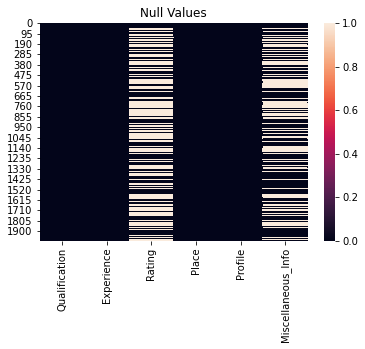

In [149]:
sns.heatmap(test.isnull())
plt.title('Null Values')
plt.show()

Above heatmap shows the null values present in columns.

# Data Cleaning

In [150]:
#working on Experience to extract int values from string

In [151]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [152]:
#Place column (Extract city and Area in diff column)
test['Place'].fillna('Notknown,Notknown',inplace=True)
test['Area'] = test['Place'].str.split(",").str[0]
test['city'] = test['Place'].str.split(",").str[1]


In [153]:
#drop place column as its not required now
test.drop('Place',axis=1,inplace=True)

In [154]:
# working on Rating column
test['Rating'].fillna('-99%',inplace=True)
test['Rating'] = test['Rating'].str.slice(stop=-1).astype(int)

In [155]:
# group rating in 10 groups, missing_value to group 0
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [int(i) for i in range(11)]
test['Rating'] = pd.cut(test['Rating'], bins=bins, labels=labels, include_lowest=True)

In [156]:
# working on dict of qualification with counts
# HERE the top 10 Qual of train and test col should be same so I am imputing the train col to test col
data = pd.read_csv('Final_Train.csv')
data['Qualification'] = data['Qualification'].str.split(",")
Qualification = {}
for x in data['Qualification']:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each] += 1
        else:
            Qualification[each] = 1

In [157]:
# finding out the top 10 Qualification
most_qual = sorted(Qualification.items(), key=lambda x:x[1], reverse=True)[:10]
final_qual = []
for qual in most_qual:
    final_qual.append(qual[0])

In [158]:
#encode the top 10 qualification in test dataset
for title in final_qual:
    test[title] = 0

In [159]:
for x,y in zip(test['Qualification'].values, np.array([i for i in range(len(test))])):
    for c in x:
        c = c.strip()
        if c in final_qual:
            test[c][y] = 1

In [160]:
#drop Qualification after getting top 10 qual.
test.drop('Qualification',axis=1,inplace=True)

In [161]:
#working on city column
test['city'] = test['city'].apply(lambda x: re.sub(' +','',x))

In [162]:
#drop Miscellaneous_Info and locality
test.drop(['Miscellaneous_Info','Area'], axis=1, inplace=True)

In [163]:
test['Experience'] = test['Experience'].str.split().str[0]
test['Experience'] = test['Experience'].astype(int)

In [164]:
from sklearn.preprocessing import LabelEncoder

In [165]:
le = LabelEncoder()
test['Profile'] = le.fit_transform(test['Profile'])

In [166]:
test['city'] = le.fit_transform(test['city'])

In [167]:
test.head()

,Experience,Rating,Profile,city,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,35,0,4,6,0,0,0,0,0,0,0,0,0,0
1,31,0,3,5,0,0,0,0,0,0,0,0,0,0
2,40,7,2,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,0,0,0,0,0,0
4,16,10,1,0,0,0,0,0,0,0,0,0,0,0


In [130]:
#save the model

In [131]:
import pickle

In [133]:
# open a file, where you ant to store the data
filename = open('drfee_rfr.pkl', 'wb')

# dump information to that file
pickle.dump(rfr_random, filename)

In [134]:
model = open('drfee_rfr.pkl','rb')
forest = pickle.load(model)

In [135]:
y_prediction =forest.predict(x_test)

In [137]:
#Load the model

In [138]:
fitted_model=pickle.load(open("drfee_rfr.pkl","rb"))

In [139]:
fitted_model

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [6, 12, 18, 24, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_leaf': [2, 5],
                                        'min_samples_split': [2, 7, 10],
                                        'n_estimators': [150, 320, 490, 660,
                                                         830, 1000]},
                   random_state=42, scoring=make_scorer(score), verbose=1)

In [140]:
#prediction over test dataset

In [141]:
predictions=fitted_model.predict(test)
predictions

array([313.36731774, 313.36731774, 303.45196712, ..., 318.79775946,
       300.6223144 , 318.79775946])

Conclusion: Thus prediction over test dataset is done.